##Load libraries

In [ ]:
!pip install keras-attention
!pip install keras-self-attention

from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from keras_self_attention import SeqSelfAttention, SeqWeightedAttention
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding
from keras import Input
from keras import models
from keras import layers
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Flatten, LSTM, Conv1D, MaxPooling1D, Dropout, Activation, SpatialDropout1D, Bidirectional, GlobalMaxPool1D
from tensorflow.keras import backend as K
from keras.utils.np_utils import to_categorical
from keras.preprocessing import sequence
from keras_self_attention  import SeqSelfAttention, SeqWeightedAttention
from numpy.random import seed

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import keras
import sklearn.metrics as metrics

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

import tensorflow as tf

  Created wheel for keras-self-attention: filename=keras_self_attention-0.47.0-cp36-none-any.whl size=17289 sha256=a417fd621243c1ff519ec102048f8f77f6c7c03fe0d4d21b80e6337bd7585459
  Stored in directory: /root/.cache/pip/wheels/70/87/01/76c703d5401b65e323927c1fdc665f3fb143282ff67d71e859
Successfully built keras-self-attention


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Import one hot train, valid, test data for subtask A,B,C.
##Import GloVe embeddings for subtask A,B,C

In [ ]:
a_trainX_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/X_train_a.csv' ,delimiter = ",", header = None)
a_validX_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/X_valid_a.csv' ,delimiter = ",", header = None)
a_testX_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/X_test_a.csv',delimiter = ",", header = None)
a_trainY_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/y_train_a.csv',delimiter = ",", header = None)
a_validY_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/y_valid_a.csv',delimiter = ",", header = None)
a_testY_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/y_test_a.csv',delimiter = ",", header = None)

b_trainX_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/X_train_b.csv',delimiter = ",", header = None)
b_validX_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/X_valid_b.csv',delimiter = ",", header = None)
b_testX_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/X_test_b.csv',delimiter = ",", header = None)
b_trainY_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/y_train_b.csv',delimiter = ",", header = None)
b_validY_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/y_valid_b.csv',delimiter = ",", header = None)
b_testY_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/y_test_b.csv',delimiter = ",", header = None)

c_trainX_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/X_train_c.csv',delimiter = ",", header = None)
c_validX_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/X_valid_c.csv',delimiter = ",", header = None)
c_testX_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/X_test_c.csv',delimiter = ",", header = None)
c_trainY_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/y_train_c.csv',delimiter = ",", header = None)
c_validY_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/y_valid_c.csv',delimiter = ",", header = None)
c_testY_df = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/y_test_c.csv',delimiter = ",", header = None)

In [ ]:
em_mat_a = pd.read_csv("/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/glove_embed_a.csv", header=None)
em_mat_b = pd.read_csv("/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/glove_embed_b.csv", header = None)
em_mat_c = pd.read_csv("/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/glove_embed_c.csv",  header=None)


In [ ]:
print(em_mat_a.shape, em_mat_b.shape, em_mat_c.shape)

(13829, 200) (8209, 200) (7752, 200)


##Get SMOTE samples for A,B,C

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 33)

#sampling_strategy=0.75

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, 

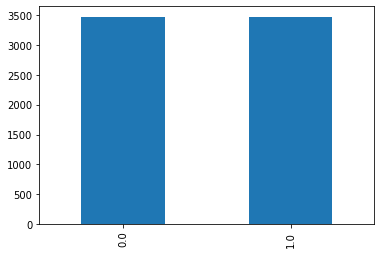

In [ ]:
a_trainX_df_sm, a_trainY_df_sm = smote.fit_sample(a_trainX_df, a_trainY_df)
b_trainX_df_sm, b_trainY_df_sm = smote.fit_sample(b_trainX_df, b_trainY_df)
c_trainX_df_sm, c_trainY_df_sm = smote.fit_sample(c_trainX_df, c_trainY_df)

# Graph to show balanced Train data
pd.Series(b_trainY_df_sm).value_counts().plot.bar()

In [ ]:
a_trainX_df.shape, a_trainX_df_sm.shape,a_validX_df.shape,a_testX_df.shape, a_trainY_df.shape, a_trainY_df_sm.shape, a_validY_df.shape, a_testY_df.shape

((11915, 40),
 (15910, 40),
 (1323, 40),
 (859, 40),
 (11915, 1),
 (15910,),
 (1323, 1),
 (859, 1))

## Output Evaluation Functions

###Binary Class Results (Subtask A & B)

---



In [ ]:
def evaluate_on_training_set(y_test, y_pred):
  roc_score = roc_auc_score(y_test,y_pred)
# Calculate AUC
  print("AUC is: ", roc_score)
  
# print out recall and precision
  print(classification_report(y_test, y_pred))
  
# print out confusion matrix
  print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))

  # # calculate points for ROC curve
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  
  # Plot ROC curve
  plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
  plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate or (1 - Specifity)')
  plt.ylabel('True Positive Rate or (Sensitivity)')
  plt.title('Receiver Operating Characteristic')

###Multiclass Results (Subtask C)

In [ ]:
# calculate AUC score by binarizing labels in a one-vs-all fashion
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelBinarizer

def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

def evaluate_on_training_set_multi(y_test, y_pred, y_pred_prob):
  # roc_auc_score not commonly implemented for multiclass, check confusion matrix instead
  roc_score = multiclass_roc_auc_score(y_test, y_pred)
  # Calculate AUC
  print("AUC is: ", roc_score)

  n_class = 3

  # roc curve for classes
  fpr = {}
  tpr = {}
  thresh ={}

  for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, y_pred_prob[:,i], pos_label=i)
  
# print out recall and precision
  print(classification_report(y_test, y_pred))
  
# print out confusion matrix
  print("Confusion Matrix: \n", metrics.confusion_matrix(y_test, y_pred))

  # plotting    
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate or (1-Specifity)')
  plt.ylabel('True Positive rate or (Sensitivity)')
  plt.legend(loc='best')


###Neural Network Evaluation 

In [ ]:
def nn_evaluation(model, x_test, y_test):
  print(model.summary())

  model_results = model.evaluate(x_test, y_test)
  print("test loss, test acc:", model_results)
  y_pred = model.predict_classes(x_test)

  results = evaluate_on_training_set(y_test, y_pred)  
  print(results)

def nn_evaluation_multi(model, x_test, y_test, y_test_oh):
  print(model.summary())

  model_results = model.evaluate(x_test, y_test_oh)
  print("test loss, test acc:", model_results)
  y_pred = model.predict_classes(x_test)
  y_pred_prob = model.predict_proba(x_test)

  results = evaluate_on_training_set_multi(y_test, y_pred, y_pred_prob)  
  print(results)


In [ ]:
def plotresults(n=1):
  plt.plot(np.arange(0, n), history.history["loss"], label="train_loss")
  plt.plot(np.arange(0, n), history.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, n), history.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, n), history.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="upper left")
  plt.show()

##Subtask A Embedding

In [ ]:
#The settings we are using 
MAX_SEQUENCE_LENGTH = 40
EMBEDDING_DIM = em_mat_a.shape[1]
word_index_a = em_mat_a.shape[0]
word_index_b = em_mat_b.shape[0]
word_index_c = em_mat_c.shape[0]

In [ ]:
embedding_layer_a = Embedding((word_index_a),
                            EMBEDDING_DIM,
                            weights=[em_mat_a],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

## Model 1: Bidirectonal LSTM -> CNN Model




In [ ]:
model_a_nn1 = Sequential() 
model_a_nn1.add(embedding_layer_a)
model_a_nn1.add(SpatialDropout1D(0.3)) #regularization
model_a_nn1.add(Bidirectional(LSTM(128, dropout=0.25, recurrent_dropout=0.25, return_sequences=True))) #stacking LSTM layer increases model capacity. If model is underfit, this is good. IF overfit, this is bad
model_a_nn1.add(Conv1D(64, 4)) #this is CNN later
model_a_nn1.add(GlobalMaxPool1D()) 
model_a_nn1.add(Dense(64, activation='relu')) #pooling increases non linearity commute. need to use relu 
model_a_nn1.add(Dense(1, activation='sigmoid'))
model_a_nn1.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
tf.random.set_seed(123)
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 5, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_a1', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model_a_nn1.fit(a_trainX_df_sm,a_trainY_df_sm ,validation_data = (a_validX_df, a_validY_df), epochs=30, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/30
498/498 [==============================] - ETA: 0s - loss: 0.6831 - accuracy: 0.5621
Epoch 00001: val_loss improved from inf to 0.63259, saving model to best_model_a1
INFO:tensorflow:Assets written to: best_model_a1/assets
498/498 [==============================] - 146s 292ms/step - loss: 0.6831 - accuracy: 0.5621 - val_loss: 0.6326 - val_accuracy: 0.6720
Epoch 2/30
498/498 [==============================] - ETA: 0s - loss: 0.6492 - accuracy: 0.6114
Epoch 00002: val_loss did not improve from 0.63259
498/498 [==============================] - 138s 277ms/step - loss: 0.6492 - accuracy: 0.6114 - val_loss: 0.6463 - val_accuracy: 0.6387
Epoch 3/30
498/498 [==============================] - ETA: 0s - loss: 0.6282 - accuracy: 0.6339
Epoch 00003: val_loss improved from 0.63259 to 0.61529, saving model to best_model_a1
INFO:tensorflow:Assets written to: best_model_a1/assets
498/498 [==============================] - 144s 288ms/step - loss: 0.6282 - accuracy: 0.6339 - val_loss: 0.6153

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           2765600   
_________________________________________________________________
spatial_dropout1d_8 (Spatial (None, 40, 200)           0         
_________________________________________________________________
bidirectional_11 (Bidirectio (None, 40, 256)           336896    
_________________________________________________________________
conv1d (Conv1D)              (None, 37, 64)            65600     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 1)               

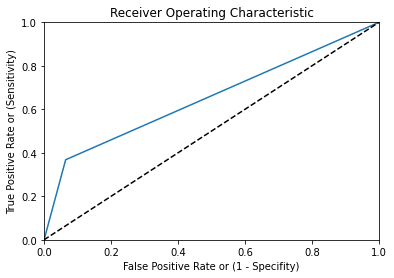

In [ ]:
saved_model_a1 = load_model('best_model_a1')
nn_evaluation(saved_model_a1, a_testX_df, a_testY_df)

## Model 2: CNN -> Bidirectional LSTM Model 

In [ ]:
model_a_nn2 = Sequential()
model_a_nn2.add(embedding_layer_a)
model_a_nn2.add(Conv1D(100, 2, activation='relu')) #filters, kernel size
model_a_nn2.add(Dropout(0.2))
model_a_nn2.add(Conv1D(100, 3, activation='relu'))
model_a_nn2.add(Dropout(0.2))
model_a_nn2.add(MaxPooling1D(3))
model_a_nn2.add(Dropout(0.5))
model_a_nn2.add(Bidirectional(LSTM(128,dropout = 0.5)))
model_a_nn2.add(Dense(1))
model_a_nn2.add(Activation('sigmoid'))
model_a_nn2.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
tf.random.set_seed(123)
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 5, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_a2', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model_a_nn2.fit(a_trainX_df_sm,a_trainY_df_sm ,validation_data = (a_validX_df, a_validY_df), epochs=20, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/20
492/498 [============================>.] - ETA: 0s - loss: 0.6901 - accuracy: 0.5502
Epoch 00001: val_loss improved from inf to 0.66991, saving model to best_model_a2
INFO:tensorflow:Assets written to: best_model_a2/assets
498/498 [==============================] - 14s 29ms/step - loss: 0.6900 - accuracy: 0.5504 - val_loss: 0.6699 - val_accuracy: 0.6115
Epoch 2/20
491/498 [============================>.] - ETA: 0s - loss: 0.6639 - accuracy: 0.6020
Epoch 00002: val_loss did not improve from 0.66991
498/498 [==============================] - 4s 7ms/step - loss: 0.6640 - accuracy: 0.6013 - val_loss: 0.6848 - val_accuracy: 0.6062
Epoch 3/20
498/498 [==============================] - ETA: 0s - loss: 0.6362 - accuracy: 0.6363
Epoch 00003: val_loss improved from 0.66991 to 0.65230, saving model to best_model_a2
INFO:tensorflow:Assets written to: best_model_a2/assets
498/498 [==============================] - 14s 28ms/step - loss: 0.6362 - accuracy: 0.6363 - val_loss: 0.6523 - val_a

Model: "sequential_24"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           2765600   
_________________________________________________________________
conv1d_26 (Conv1D)           (None, 39, 100)           40100     
_________________________________________________________________
dropout_14 (Dropout)         (None, 39, 100)           0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 37, 100)           30100     
_________________________________________________________________
dropout_15 (Dropout)         (None, 37, 100)           0         
_________________________________________________________________
max_pooling1d_12 (MaxPooling (None, 12, 100)           0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 12, 100)         

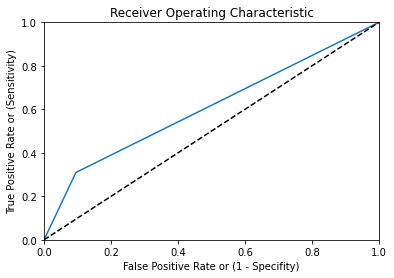

In [ ]:
saved_model_a2 = load_model('best_model_a2')
nn_evaluation(saved_model_a2, a_testX_df, a_testY_df)

## Model 3: CNN -> Bidirectional LSTM Model 

In [ ]:
model_a_nn3 = Sequential()
model_a_nn3.add(embedding_layer_a)
model_a_nn3.add(Conv1D(100, 3, activation='relu')) #filters, kernel size
model_a_nn3.add(Dropout(0.2))
model_a_nn3.add(MaxPooling1D(3))
model_a_nn3.add(Dropout(0.5))
model_a_nn3.add(Bidirectional(LSTM(128,dropout = 0.3)))
model_a_nn3.add(Dense(1))
model_a_nn3.add(Activation('sigmoid'))
model_a_nn3.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
tf.random.set_seed(123)
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 20, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_a3', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model_a_nn3.fit(a_trainX_df_sm,a_trainY_df_sm ,validation_data = (a_validX_df, a_validY_df), epochs=50, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/50
498/498 [==============================] - ETA: 0s - loss: 0.6881 - accuracy: 0.5584
Epoch 00001: val_loss improved from inf to 0.66171, saving model to best_model_a3
INFO:tensorflow:Assets written to: best_model_a3/assets
498/498 [==============================] - 14s 29ms/step - loss: 0.6881 - accuracy: 0.5584 - val_loss: 0.6617 - val_accuracy: 0.6243
Epoch 2/50
497/498 [============================>.] - ETA: 0s - loss: 0.6668 - accuracy: 0.5985
Epoch 00002: val_loss did not improve from 0.66171
498/498 [==============================] - 4s 7ms/step - loss: 0.6669 - accuracy: 0.5984 - val_loss: 0.7114 - val_accuracy: 0.5865
Epoch 3/50
494/498 [============================>.] - ETA: 0s - loss: 0.6490 - accuracy: 0.6210
Epoch 00003: val_loss did not improve from 0.66171
498/498 [==============================] - 4s 7ms/step - loss: 0.6490 - accuracy: 0.6207 - val_loss: 0.6787 - val_accuracy: 0.5941
Epoch 4/50
498/498 [==============================] - ETA: 0s - loss: 0.6324 

Model: "sequential_27"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           2765600   
_________________________________________________________________
conv1d_30 (Conv1D)           (None, 38, 100)           60100     
_________________________________________________________________
dropout_21 (Dropout)         (None, 38, 100)           0         
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 12, 100)           0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 12, 100)           0         
_________________________________________________________________
bidirectional_29 (Bidirectio (None, 256)               234496    
_________________________________________________________________
dense_19 (Dense)             (None, 1)               

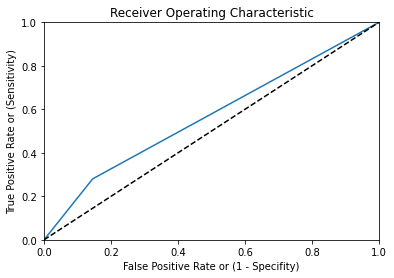

In [ ]:
saved_model_a3 = load_model('best_model_a3')
nn_evaluation(saved_model_a3, a_testX_df, a_testY_df)

# Best Performing Model
## Model 4: Bidirectional LSTM + Attention + CNN Model 

In [ ]:
model_a_nn4 = Sequential() 
model_a_nn4.add(embedding_layer_a)
model_a_nn4.add(Bidirectional(LSTM(128, dropout=0.25, recurrent_dropout=0.25, return_sequences=True))) #regularization for each rnn cell, regularization across rnn cell, return hidden states of each word in tweet
model_a_nn4.add(Bidirectional(LSTM(128, dropout=0.25, recurrent_dropout=0.25, return_sequences=True))) #stacking LSTM layer increases model capacity. If model is underfit, this is good. IF overfit, this is bad
model_a_nn4.add(SeqSelfAttention(attention_activation='sigmoid'))
model_a_nn4.add(Conv1D(64, 4)) #this is CNN later
model_a_nn4.add(GlobalMaxPool1D()) #Pooling comes after convolution. Achieve translation invariance??
model_a_nn4.add(Dropout(0.5))
model_a_nn4.add(Dense(64, activation='relu')) #pooling increases non linearity commute. need to use relu 
model_a_nn4.add(Dropout(0.2))
model_a_nn4.add(Dense(1, activation='sigmoid'))
model_a_nn4.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
tf.random.set_seed(123)
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 10, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_a4', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history4 = model_a_nn4.fit( a_trainX_df,a_trainY_df ,validation_data = (a_validX_df, a_validY_df), epochs=25, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/25
373/373 [==============================] - ETA: 0s - loss: 0.5459 - accuracy: 0.7328
Epoch 00001: val_loss improved from inf to 0.50182, saving model to best_model_a4
INFO:tensorflow:Assets written to: best_model_a4/assets
373/373 [==============================] - 329s 882ms/step - loss: 0.5459 - accuracy: 0.7328 - val_loss: 0.5018 - val_accuracy: 0.7553
Epoch 2/25
373/373 [==============================] - ETA: 0s - loss: 0.4854 - accuracy: 0.7703
Epoch 00002: val_loss improved from 0.50182 to 0.45676, saving model to best_model_a4
INFO:tensorflow:Assets written to: best_model_a4/assets
373/373 [==============================] - 329s 881ms/step - loss: 0.4854 - accuracy: 0.7703 - val_loss: 0.4568 - val_accuracy: 0.7863
Epoch 3/25
373/373 [==============================] - ETA: 0s - loss: 0.4667 - accuracy: 0.7798
Epoch 00003: val_loss improved from 0.45676 to 0.45095, saving model to best_model_a4
INFO:tensorflow:Assets written to: best_model_a4/assets
373/373 [===========

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           2765600   
_________________________________________________________________
bidirectional_34 (Bidirectio (None, 40, 256)           336896    
_________________________________________________________________
bidirectional_35 (Bidirectio (None, 40, 256)           394240    
_________________________________________________________________
seq_self_attention_20 (SeqSe (None, None, 256)         16449     
_________________________________________________________________
conv1d_33 (Conv1D)           (None, None, 64)          65600     
_________________________________________________________________
global_max_pooling1d_4 (Glob (None, 64)                0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 64)              

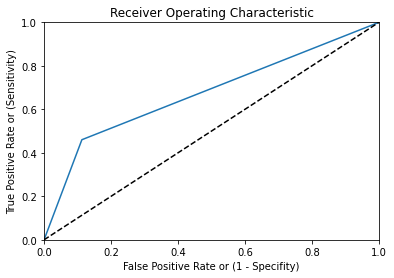

In [ ]:
saved_model_a4 = load_model('best_model_a4')
nn_evaluation(saved_model_a4, a_testX_df, a_testY_df)

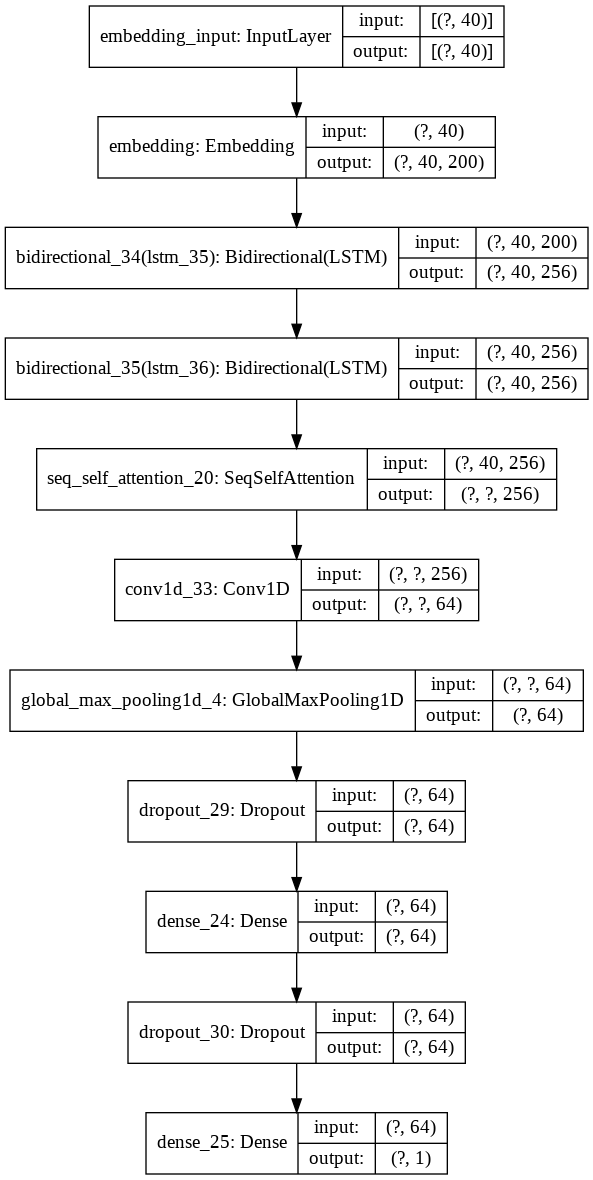

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_a_nn4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def plotresults(n):
  plt.plot(np.arange(0, n), history4.history["loss"], label="train_loss")
  plt.plot(np.arange(0, n), history4.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, n), history4.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, n), history4.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="upper left")
  plt.axvline(x=5).set_color('black')
  plt.show()

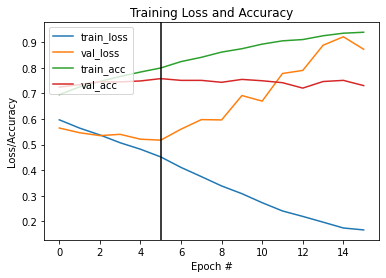

In [ ]:
plotresults(16)


##Model 5: CNN -> LSTM Model

In [ ]:
model_a_nn5 = Sequential() 
model_a_nn5.add(embedding_layer_a)
model_a_nn5.add(Conv1D(100, 2, activation='relu')) #filters, kernel size
model_a_nn5.add(Dropout(0.2))
model_a_nn5.add(Conv1D(100, 3, activation='relu'))
model_a_nn5.add(Dropout(0.2))
model_a_nn5.add(MaxPooling1D(3))
model_a_nn5.add(Conv1D(160, 4, activation='relu'))
model_a_nn5.add(Dropout(0.2))
model_a_nn5.add(Conv1D(160, 5, activation='relu'))
model_a_nn5.add(Dropout(0.2))
model_a_nn5.add(LSTM(128,dropout = 0.3))
model_a_nn5.add(Dense(1))
model_a_nn5.add(Activation('sigmoid'))
model_a_nn5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
tf.random.set_seed(123)

earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 10, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_a5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model_a_nn5.fit(a_trainX_df_sm,a_trainY_df_sm ,validation_data = (a_validX_df, a_validY_df), epochs=30, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/30
496/498 [============================>.] - ETA: 0s - loss: 0.4429 - accuracy: 0.7920
Epoch 00001: val_loss improved from inf to 0.68465, saving model to best_model_a5
INFO:tensorflow:Assets written to: best_model_a5/assets
498/498 [==============================] - 7s 15ms/step - loss: 0.4429 - accuracy: 0.7920 - val_loss: 0.6847 - val_accuracy: 0.6818
Epoch 2/30
491/498 [============================>.] - ETA: 0s - loss: 0.4054 - accuracy: 0.8158
Epoch 00002: val_loss did not improve from 0.68465
498/498 [==============================] - 3s 6ms/step - loss: 0.4050 - accuracy: 0.8159 - val_loss: 0.7433 - val_accuracy: 0.6531
Epoch 3/30
494/498 [============================>.] - ETA: 0s - loss: 0.3689 - accuracy: 0.8338
Epoch 00003: val_loss did not improve from 0.68465
498/498 [==============================] - 3s 6ms/step - loss: 0.3686 - accuracy: 0.8339 - val_loss: 0.7523 - val_accuracy: 0.6425
Epoch 4/30
493/498 [============================>.] - ETA: 0s - loss: 0.3460 -

Model: "sequential_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           2765600   
_________________________________________________________________
conv1d_34 (Conv1D)           (None, 39, 100)           40100     
_________________________________________________________________
dropout_31 (Dropout)         (None, 39, 100)           0         
_________________________________________________________________
conv1d_35 (Conv1D)           (None, 37, 100)           30100     
_________________________________________________________________
dropout_32 (Dropout)         (None, 37, 100)           0         
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 12, 100)           0         
_________________________________________________________________
conv1d_36 (Conv1D)           (None, 9, 160)          

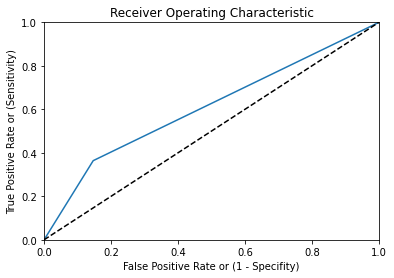

In [ ]:
saved_model_a5 = load_model('best_model_a5')
nn_evaluation(saved_model_a5, a_testX_df, a_testY_df)

Subtask B Embedding

In [ ]:
#The settings we are using 
MAX_SEQUENCE_LENGTH = 40
EMBEDDING_DIM = em_mat_a.shape[1]
word_index_a = em_mat_a.shape[0]
word_index_b = em_mat_b.shape[0]
word_index_c = em_mat_c.shape[0]

embedding_layer_b = Embedding((word_index_b),
                            EMBEDDING_DIM,
                            weights=[em_mat_b],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

## Model 1: Bidirectonal LSTM -> CNN Model

In [ ]:
model_b_nn1 = Sequential() 
model_b_nn1.add(embedding_layer_b)
model_b_nn1.add(SpatialDropout1D(0.3)) #regularization
model_b_nn1.add(Bidirectional(LSTM(128, dropout=0.25, recurrent_dropout=0.25, return_sequences=True))) #stacking LSTM layer increases model capacity. If model is underfit, this is good. IF overfit, this is bad
model_b_nn1.add(Conv1D(64, 4)) #this is CNN later
model_b_nn1.add(GlobalMaxPool1D()) 
model_b_nn1.add(Dense(64, activation='relu')) #pooling increases non linearity commute. need to use relu 
model_b_nn1.add(Dense(1, activation='sigmoid'))
model_b_nn1.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
#b_trainX_df_sm, b_trainY_df_sm = smote.fit_sample(b_trainX_df, b_trainY_df)
tf.random.set_seed(123)

earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 10, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_b1', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model_b_nn2.fit(b_trainX_df_sm,b_trainY_df_sm ,validation_data = (b_validX_df, b_validY_df), epochs=5, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/5
190/190 [==============================] - ETA: 0s - loss: 0.6642 - accuracy: 0.6021
Epoch 00001: val_loss improved from inf to 0.47396, saving model to best_model_b2
INFO:tensorflow:Assets written to: best_model_b2/assets
190/190 [==============================] - 61s 321ms/step - loss: 0.6642 - accuracy: 0.6021 - val_loss: 0.4740 - val_accuracy: 0.8519
Epoch 2/5
190/190 [==============================] - ETA: 0s - loss: 0.5968 - accuracy: 0.6774
Epoch 00002: val_loss did not improve from 0.47396
190/190 [==============================] - 53s 281ms/step - loss: 0.5968 - accuracy: 0.6774 - val_loss: 0.6343 - val_accuracy: 0.6196
Epoch 3/5
190/190 [==============================] - ETA: 0s - loss: 0.5563 - accuracy: 0.7167
Epoch 00003: val_loss improved from 0.47396 to 0.46316, saving model to best_model_b2
INFO:tensorflow:Assets written to: best_model_b2/assets
190/190 [==============================] - 60s 313ms/step - loss: 0.5563 - accuracy: 0.7167 - val_loss: 0.4632 - val

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 40, 200)           1641800   
_________________________________________________________________
spatial_dropout1d_13 (Spatia (None, 40, 200)           0         
_________________________________________________________________
bidirectional_40 (Bidirectio (None, 40, 256)           336896    
_________________________________________________________________
conv1d_50 (Conv1D)           (None, 37, 64)            65600     
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 64)                0         
_________________________________________________________________
dense_37 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_38 (Dense)             (None, 1)               

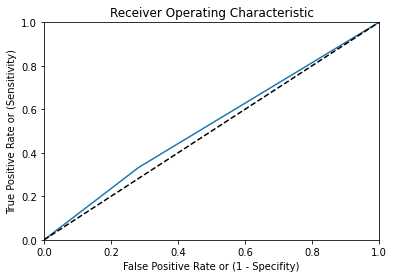

In [ ]:
saved_model_b1 = load_model('best_model_b1')
nn_evaluation(saved_model_b2, b_testX_df, b_testY_df)

## Model 2: CNN -> BiLSTM Model

In [ ]:
model_b_nn2 = Sequential()
model_b_nn2.add(embedding_layer_b)
model_b_nn2.add(Conv1D(100, 2, activation='relu')) #filters, kernel size
model_b_nn2.add(Dropout(0.2))
model_b_nn2.add(Conv1D(100, 3, activation='relu'))
model_b_nn2.add(Dropout(0.2))
model_b_nn2.add(MaxPooling1D(3))
model_b_nn2.add(Dropout(0.5))
model_b_nn2.add(Bidirectional(LSTM(128,dropout = 0.5)))
model_b_nn2.add(Dense(1))
model_b_nn2.add(Activation('sigmoid'))
model_b_nn2.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
tf.random.set_seed(123)
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 5, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_b2', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model_b_nn2.fit(b_trainX_df_sm,b_trainY_df_sm ,validation_data = (b_validX_df, b_validY_df), epochs=20, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/20
218/218 [==============================] - ETA: 0s - loss: 0.6830 - accuracy: 0.5633
Epoch 00001: val_loss improved from inf to 0.85254, saving model to best_model_b2
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: best_model_b2/assets
218/218 [==============================] - 13s 62ms/step - loss: 0.6830 - accuracy: 0.5633 - val_loss: 0.8525 - val_accuracy: 0.1731
Epoch 2/20
218/218 [==============================] - ETA: 0s - loss: 0.6437 - accuracy: 0.6326
Epoch 00002: val_loss improved from 0.85254 to 0.52144, saving model to best_model_b2
INFO:tensorflow:Assets written to: best_model_b2/assets
218/218 [==============================] - 13s 60ms/step - loss: 0.6437 - accuracy: 0.6326 - val_loss: 0.5214 - val_accuracy: 0.7517
Epoch 3/20
215/218 [========

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           1641800   
_________________________________________________________________
conv1d (Conv1D)              (None, 39, 100)           40100     
_________________________________________________________________
dropout (Dropout)            (None, 39, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 37, 100)           30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 100)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 12, 100)           0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 100)          

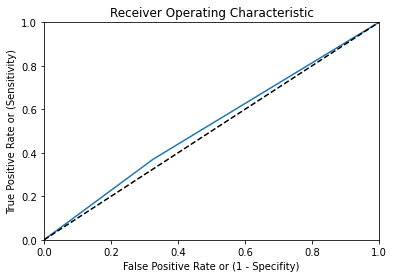

In [ ]:
saved_model_b2 = load_model('best_model_b2')
nn_evaluation(saved_model_b2, b_testX_df, b_testY_df)

##Model 3: CNN -> Bidirectional LSTM Model

In [ ]:
model_b_nn3 = Sequential()
model_b_nn3.add(embedding_layer_b)
model_b_nn3.add(Conv1D(100, 3, activation='relu')) #filters, kernel size
model_b_nn3.add(Dropout(0.2))
model_b_nn3.add(MaxPooling1D(3))
model_b_nn3.add(Dropout(0.5))
model_b_nn3.add(Bidirectional(LSTM(128,dropout = 0.3)))
model_b_nn3.add(Dense(1))
model_b_nn3.add(Activation('sigmoid'))
model_b_nn3.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
tf.random.set_seed(123)
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 5, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_b3', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model_b_nn3.fit(b_trainX_df_sm,b_trainY_df_sm ,validation_data = (b_validX_df, b_validY_df), epochs=20, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/20
216/218 [============================>.] - ETA: 0s - loss: 0.6792 - accuracy: 0.5745
Epoch 00001: val_loss improved from inf to 0.81927, saving model to best_model_b3
INFO:tensorflow:Assets written to: best_model_b3/assets
218/218 [==============================] - 14s 63ms/step - loss: 0.6791 - accuracy: 0.5744 - val_loss: 0.8193 - val_accuracy: 0.2938
Epoch 2/20
214/218 [============================>.] - ETA: 0s - loss: 0.6338 - accuracy: 0.6414
Epoch 00002: val_loss improved from 0.81927 to 0.63095, saving model to best_model_b3
INFO:tensorflow:Assets written to: best_model_b3/assets
218/218 [==============================] - 13s 60ms/step - loss: 0.6335 - accuracy: 0.6419 - val_loss: 0.6310 - val_accuracy: 0.6287
Epoch 3/20
217/218 [============================>.] - ETA: 0s - loss: 0.5740 - accuracy: 0.6979
Epoch 00003: val_loss improved from 0.63095 to 0.61998, saving model to best_model_b3
INFO:tensorflow:Assets written to: best_model_b3/assets
218/218 [===============

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           1641800   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 38, 100)           60100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 38, 100)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 12, 100)           0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 12, 100)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               234496    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

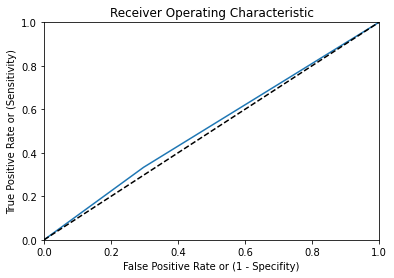

In [ ]:
saved_model_b3 = load_model('best_model_b3')
nn_evaluation(saved_model_b3, b_testX_df, b_testY_df)

## Model 4: Bidirectional LSTM + Attention + CNN Model 

In [ ]:
model_b_nn4 = Sequential() 
model_b_nn4.add(embedding_layer_b)
model_b_nn4.add(Bidirectional(LSTM(128, dropout=0.25, recurrent_dropout=0.25, return_sequences=True))) #regularization for each rnn cell, regularization across rnn cell, return hidden states of each word in tweet
model_b_nn4.add(Dropout(0.5))
model_b_nn4.add(Bidirectional(LSTM(128, dropout=0.25, recurrent_dropout=0.25, return_sequences=True))) #stacking LSTM layer increases model capacity. If model is underfit, this is good. IF overfit, this is bad
model_b_nn4.add(Dropout(0.5))
model_b_nn4.add(SeqSelfAttention(attention_activation='sigmoid'))
model_b_nn4.add(Conv1D(64, 4)) #this is CNN later
model_b_nn4.add(GlobalMaxPool1D()) #Pooling comes after convolution. Achieve translation invariance??
model_b_nn4.add(Dropout(0.5))
model_b_nn4.add(Dense(64, activation='relu')) #pooling increases non linearity commute. need to use relu 
model_b_nn4.add(Dropout(0.2))
model_b_nn4.add(Dense(1, activation='sigmoid'))
model_b_nn4.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
tf.random.set_seed(123)
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 5, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_b4', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model_b_nn4.fit(b_trainX_df_sm,b_trainY_df_sm ,validation_data = (b_validX_df, b_validY_df), epochs=20, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/20
218/218 [==============================] - ETA: 0s - loss: 0.6724 - accuracy: 0.5853
Epoch 00001: val_loss improved from inf to 0.85129, saving model to best_model_b4
INFO:tensorflow:Assets written to: best_model_b4/assets
218/218 [==============================] - 145s 666ms/step - loss: 0.6724 - accuracy: 0.5853 - val_loss: 0.8513 - val_accuracy: 0.4077
Epoch 2/20
218/218 [==============================] - ETA: 0s - loss: 0.6141 - accuracy: 0.6783
Epoch 00002: val_loss improved from 0.85129 to 0.59130, saving model to best_model_b4
INFO:tensorflow:Assets written to: best_model_b4/assets
218/218 [==============================] - 146s 667ms/step - loss: 0.6141 - accuracy: 0.6783 - val_loss: 0.5913 - val_accuracy: 0.6765
Epoch 3/20
218/218 [==============================] - ETA: 0s - loss: 0.5536 - accuracy: 0.7281
Epoch 00003: val_loss did not improve from 0.59130
218/218 [==============================] - 132s 604ms/step - loss: 0.5536 - accuracy: 0.7281 - val_loss: 0.7535

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           1641800   
_________________________________________________________________
bidirectional_3 (Bidirection (None, 40, 256)           336896    
_________________________________________________________________
dropout_7 (Dropout)          (None, 40, 256)           0         
_________________________________________________________________
bidirectional_4 (Bidirection (None, 40, 256)           394240    
_________________________________________________________________
dropout_8 (Dropout)          (None, 40, 256)           0         
_________________________________________________________________
seq_self_attention (SeqSelfA (None, None, 256)         16449     
_________________________________________________________________
conv1d_4 (Conv1D)            (None, None, 64)         

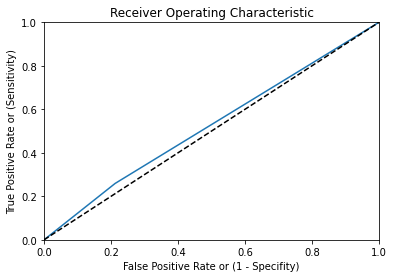

In [ ]:
saved_model_b4 = load_model('best_model_b4')
nn_evaluation(saved_model_b4, b_testX_df, b_testY_df)

Model 5: CNN-> LTSM Model

In [ ]:
model_b_nn5 = Sequential() 
model_b_nn5.add(embedding_layer_b)
model_b_nn5.add(Conv1D(100, 2, activation='relu')) #filters, kernel size
model_b_nn5.add(Dropout(0.2))
model_b_nn5.add(Conv1D(100, 3, activation='relu'))
model_b_nn5.add(Dropout(0.2))
model_b_nn5.add(MaxPooling1D(3))
model_b_nn5.add(Conv1D(160, 4, activation='relu'))
model_b_nn5.add(Dropout(0.2))
model_b_nn5.add(Conv1D(160, 5, activation='relu'))
model_b_nn5.add(Dropout(0.2))
model_b_nn5.add(LSTM(128))
model_b_nn5.add(Dropout(0.3))
model_b_nn5.add(Dense(1))
model_b_nn5.add(Activation('sigmoid'))
model_b_nn5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
tf.random.set_seed(123)
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 10, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_b5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model_b_nn5.fit(b_trainX_df_sm,b_trainY_df_sm ,validation_data = (b_validX_df, b_validY_df), epochs=40, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/40
218/218 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.5786
Epoch 00001: val_loss improved from inf to 0.75902, saving model to best_model_b5
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: best_model_b5/assets
218/218 [==============================] - 9s 40ms/step - loss: 0.6735 - accuracy: 0.5786 - val_loss: 0.7590 - val_accuracy: 0.4545
Epoch 2/40
216/218 [============================>.] - ETA: 0s - loss: 0.6127 - accuracy: 0.6739
Epoch 00002: val_loss improved from 0.75902 to 0.56449, saving model to best_model_b5
INFO:tensorflow:Assets written to: best_model_b5/assets
218/218 [==============================] - 8s 35ms/step - loss: 0.6125 - accuracy: 0.6744 - val_loss: 0.5645 - val_accuracy: 0.7091
Epoch 3/40
217/218 [==========

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           1641800   
_________________________________________________________________
conv1d (Conv1D)              (None, 39, 100)           40100     
_________________________________________________________________
dropout (Dropout)            (None, 39, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 37, 100)           30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 100)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 12, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 9, 160)            6

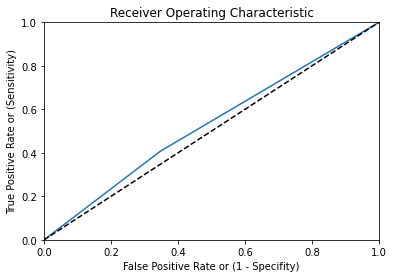

In [ ]:
saved_model_b5 = load_model('best_model_b5')
nn_evaluation(saved_model_b5, b_testX_df, b_testY_df)

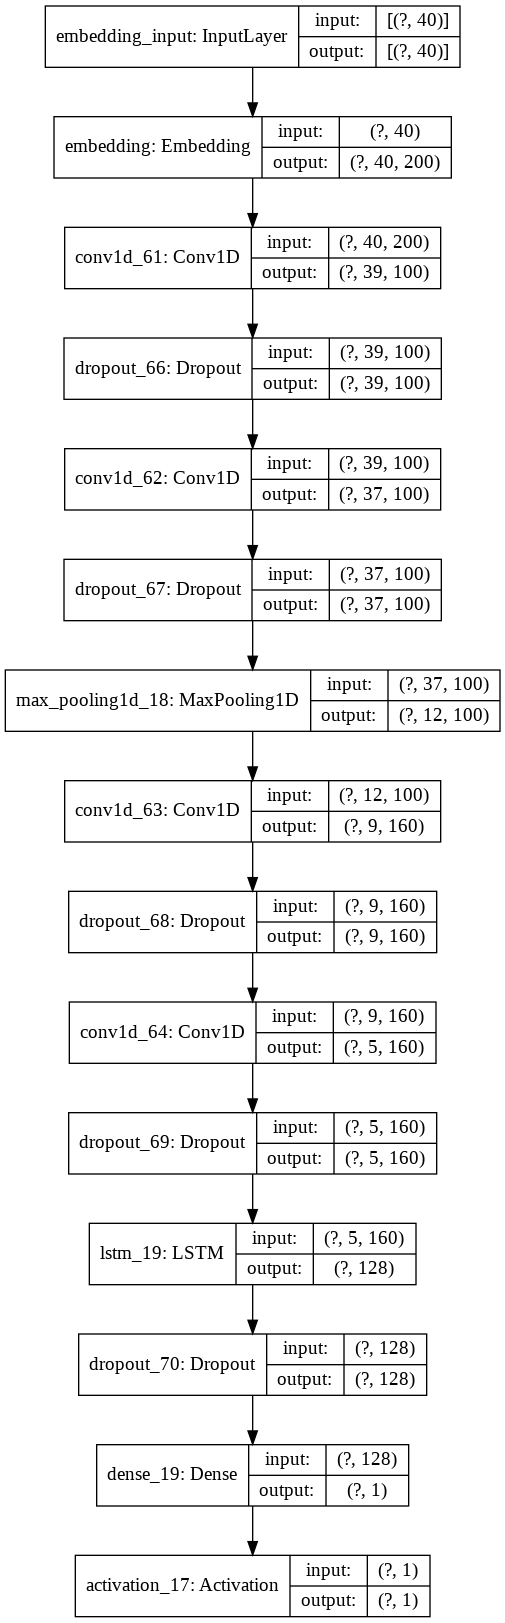

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_b_nn5, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

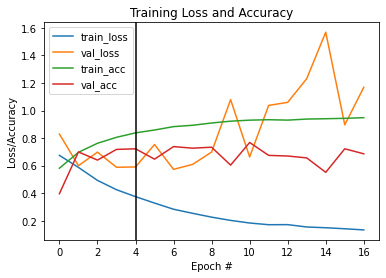

In [ ]:
def plotresults(n):
  plt.plot(np.arange(0, n), history.history["loss"], label="train_loss")
  plt.plot(np.arange(0, n), history.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, n), history.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, n), history.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="upper left")
  plt.axvline(x=4).set_color('black')
  plt.show()

plotresults(17)

## Subtask C Embedding

In [ ]:
embedding_layer_c = Embedding((word_index_c),
                            EMBEDDING_DIM,
                            weights=[em_mat_c],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

# One-hot encoding
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(c_trainY_df_sm)
#print(encoder.classes_)

#encoded_Y = encoder.transform(Y)
c_trainY_df_sm_oh = encoder.transform(c_trainY_df_sm)
c_validY_df_oh = encoder.transform(c_validY_df)
c_testY_df_oh = encoder.transform(c_testY_df)

# convert integers to dummy variables (i.e. one hot encoded)
#dummy_y = np_utils.to_categorical(encoded_Y)
c_trainY_df_sm_oh = np_utils.to_categorical(c_trainY_df_sm_oh)
print(c_trainY_df_sm_oh)
c_validY_df_oh = np_utils.to_categorical(c_validY_df_oh)
print(c_validY_df_oh)
c_testY_df_oh = np_utils.to_categorical(c_testY_df_oh)
print(c_testY_df_oh)

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0.

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Model 1: Bidirectonal LSTM -> CNN Model

In [ ]:
model_c_nn1 = Sequential() 
model_c_nn1.add(embedding_layer_c)
model_c_nn1.add(SpatialDropout1D(0.3)) #regularization
model_c_nn1.add(Bidirectional(LSTM(128, dropout=0.25, recurrent_dropout=0.25, return_sequences=True))) #stacking LSTM layer increases model capacity. If model is underfit, this is good. IF overfit, this is bad
model_c_nn1.add(Conv1D(64, 4)) #this is CNN later
model_c_nn1.add(GlobalMaxPool1D()) 
model_c_nn1.add(Dense(64, activation='relu')) #pooling increases non linearity commute. need to use relu 
model_c_nn1.add(Dense(3, activation='softmax'))
model_c_nn1.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
tf.random.set_seed(123)
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 5, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_c1', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model_c_nn1.fit(c_trainX_df_sm,c_trainY_df_sm_oh ,validation_data = (c_validX_df, c_validY_df_oh), epochs=30, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/30
202/202 [==============================] - ETA: 0s - loss: 0.7905 - accuracy: 0.6351
Epoch 00001: val_loss improved from inf to 0.85075, saving model to best_model_c1
INFO:tensorflow:Assets written to: best_model_c1/assets
202/202 [==============================] - 98s 484ms/step - loss: 0.7905 - accuracy: 0.6351 - val_loss: 0.8508 - val_accuracy: 0.6486
Epoch 2/30
202/202 [==============================] - ETA: 0s - loss: 0.7240 - accuracy: 0.6614
Epoch 00002: val_loss did not improve from 0.85075
202/202 [==============================] - 87s 431ms/step - loss: 0.7240 - accuracy: 0.6614 - val_loss: 1.0239 - val_accuracy: 0.5556
Epoch 3/30
202/202 [==============================] - ETA: 0s - loss: 0.6555 - accuracy: 0.7022
Epoch 00003: val_loss did not improve from 0.85075
202/202 [==============================] - 86s 427ms/step - loss: 0.6555 - accuracy: 0.7022 - val_loss: 0.9842 - val_accuracy: 0.6227
Epoch 4/30
202/202 [==============================] - ETA: 0s - loss: 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           1550400   
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 40, 200)           0         
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40, 256)           336896    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 37, 64)            65600     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                

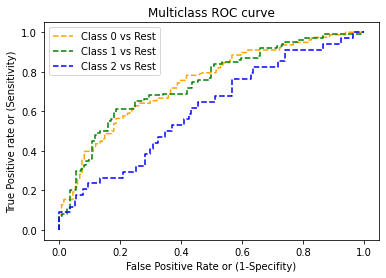

In [ ]:
saved_model_c1 = load_model('best_model_c1')
nn_evaluation_multi(saved_model_c1, c_testX_df, c_testY_df, c_testY_df_oh)

## Model 2: CNN -> Bidirectional LSTM Model 

In [ ]:
model_c_nn2 = Sequential()
model_c_nn2.add(embedding_layer_c)
model_c_nn2.add(Conv1D(100, 2, activation='relu')) #filters, kernel size
model_c_nn2.add(Dropout(0.2))
model_c_nn2.add(Conv1D(100, 3, activation='relu'))
model_c_nn2.add(Dropout(0.2))
model_c_nn2.add(MaxPooling1D(3))
model_c_nn2.add(Dropout(0.5))
model_c_nn2.add(Bidirectional(LSTM(128,dropout = 0.5)))
model_c_nn2.add(Dense(3))
model_c_nn2.add(Activation('softmax'))
model_c_nn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
tf.random.set_seed(123)
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 5, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_c2', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model_c_nn2.fit(c_trainX_df_sm,c_trainY_df_sm_oh ,validation_data = (c_validX_df, c_validY_df_oh), epochs=20, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/20
202/202 [==============================] - ETA: 0s - loss: 1.0606 - accuracy: 0.4233
Epoch 00001: val_loss improved from inf to 0.93817, saving model to best_model_c2
INFO:tensorflow:Assets written to: best_model_c2/assets
202/202 [==============================] - 18s 88ms/step - loss: 1.0606 - accuracy: 0.4233 - val_loss: 0.9382 - val_accuracy: 0.6160
Epoch 2/20
197/202 [============================>.] - ETA: 0s - loss: 0.9922 - accuracy: 0.4852
Epoch 00002: val_loss improved from 0.93817 to 0.93486, saving model to best_model_c2
INFO:tensorflow:Assets written to: best_model_c2/assets
202/202 [==============================] - 17s 83ms/step - loss: 0.9920 - accuracy: 0.4859 - val_loss: 0.9349 - val_accuracy: 0.6160
Epoch 3/20
200/202 [============================>.] - ETA: 0s - loss: 0.9595 - accuracy: 0.5144
Epoch 00003: val_loss did not improve from 0.93486
202/202 [==============================] - 2s 9ms/step - loss: 0.9599 - accuracy: 0.5141 - val_loss: 0.9676 - val_a

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 200)           1550400   
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 39, 100)           40100     
_________________________________________________________________
dropout_71 (Dropout)         (None, 39, 100)           0         
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 37, 100)           30100     
_________________________________________________________________
dropout_72 (Dropout)         (None, 37, 100)           0         
_________________________________________________________________
max_pooling1d_19 (MaxPooling (None, 12, 100)           0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 12, 100)         

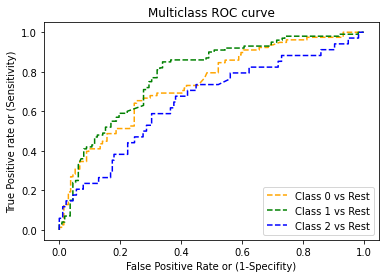

In [ ]:
saved_model_c2 = load_model('best_model_c2')
nn_evaluation_multi(saved_model_c2, c_testX_df, c_testY_df, c_testY_df_oh)

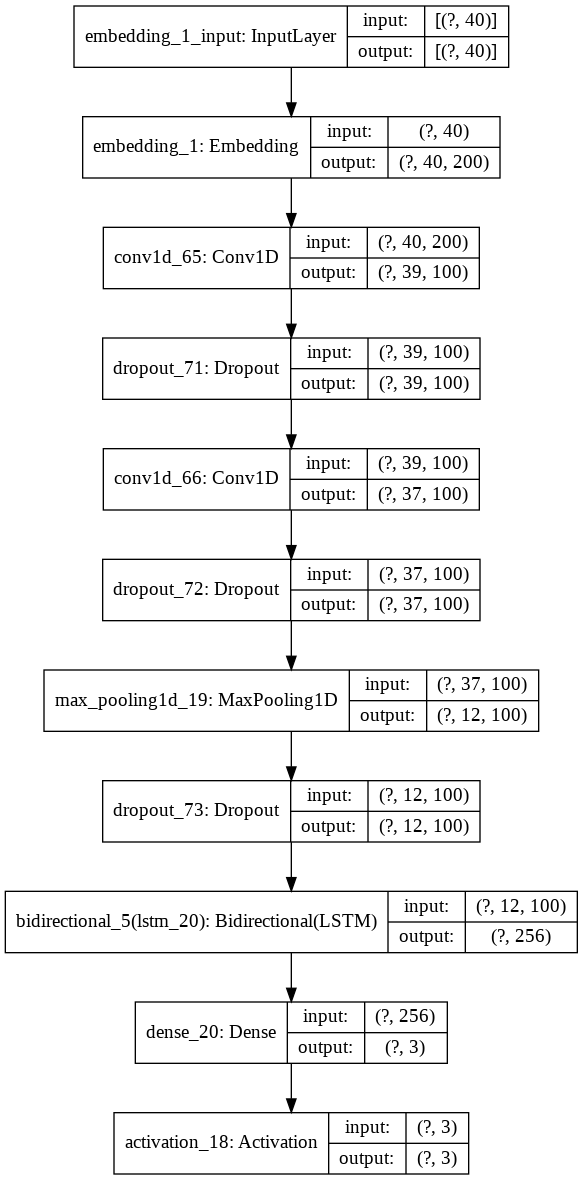

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model_c_nn2, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def plotresults(n):
  plt.plot(np.arange(0, n), history.history["loss"], label="train_loss")
  plt.plot(np.arange(0, n), history.history["val_loss"], label="val_loss")
  plt.plot(np.arange(0, n), history.history["accuracy"], label="train_acc")
  plt.plot(np.arange(0, n), history.history["val_accuracy"], label="val_acc")
  plt.title("Training Loss and Accuracy")
  plt.xlabel("Epoch #")
  plt.ylabel("Loss/Accuracy")
  plt.legend(loc="upper left")
  plt.axvline(x=4).set_color('black')
  plt.show()

plotresults(10)

NameError: ignored

## Model 3: CNN -> Bidirectional LSTM Model 

In [ ]:
model_c_nn3 = Sequential()
model_c_nn3.add(embedding_layer_c)
model_c_nn3.add(Conv1D(100, 3, activation='relu')) #filters, kernel size
model_c_nn3.add(Dropout(0.2))
model_c_nn3.add(MaxPooling1D(3))
model_c_nn3.add(Dropout(0.5))
model_c_nn3.add(Bidirectional(LSTM(128,dropout = 0.3)))
model_c_nn3.add(Dense(3))
model_c_nn3.add(Activation('softmax'))
model_c_nn3.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
tf.random.set_seed(123)
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 20, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_c3', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model_c_nn3.fit(c_trainX_df_sm,c_trainY_df_sm_oh ,validation_data = (c_validX_df, c_validY_df_oh), epochs=50, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/50
202/202 [==============================] - ETA: 0s - loss: 1.0564 - accuracy: 0.4369
Epoch 00001: val_loss improved from inf to 0.96747, saving model to best_model_c3
INFO:tensorflow:Assets written to: best_model_c3/assets
202/202 [==============================] - 18s 89ms/step - loss: 1.0564 - accuracy: 0.4369 - val_loss: 0.9675 - val_accuracy: 0.6331
Epoch 2/50
201/202 [============================>.] - ETA: 0s - loss: 0.9939 - accuracy: 0.4941
Epoch 00002: val_loss improved from 0.96747 to 0.90241, saving model to best_model_c3
INFO:tensorflow:Assets written to: best_model_c3/assets
202/202 [==============================] - 18s 87ms/step - loss: 0.9937 - accuracy: 0.4944 - val_loss: 0.9024 - val_accuracy: 0.6563
Epoch 3/50
200/202 [============================>.] - ETA: 0s - loss: 0.9545 - accuracy: 0.5297
Epoch 00003: val_loss did not improve from 0.90241
202/202 [==============================] - 3s 13ms/step - loss: 0.9543 - accuracy: 0.5292 - val_loss: 0.9106 - val_

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           1550400   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 38, 100)           60100     
_________________________________________________________________
dropout_3 (Dropout)          (None, 38, 100)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 100)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 100)           0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 256)               234496    
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

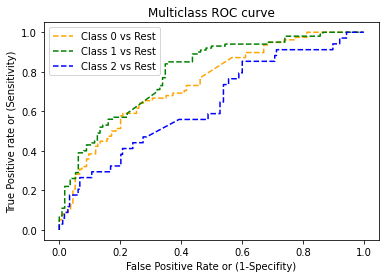

In [ ]:
saved_model_c3 = load_model('best_model_c3')
nn_evaluation_multi(saved_model_c3, c_testX_df, c_testY_df, c_testY_df_oh)

## Model 4: Bidirectional LSTM + Attention + CNN Model 

In [ ]:
model_c_nn4 = Sequential() 
model_c_nn4.add(embedding_layer_c)
model_c_nn4.add(Bidirectional(LSTM(128, dropout=0.25, recurrent_dropout=0.25, return_sequences=True))) #regularization for each rnn cell, regularization across rnn cell, return hidden states of each word in tweet
model_c_nn4.add(Bidirectional(LSTM(128, dropout=0.25, recurrent_dropout=0.25, return_sequences=True))) #stacking LSTM layer increases model capacity. If model is underfit, this is good. IF overfit, this is bad
model_c_nn4.add(SeqSelfAttention(attention_activation='sigmoid'))
model_c_nn4.add(Conv1D(64, 4)) #this is CNN later
model_c_nn4.add(GlobalMaxPool1D()) #Pooling comes after convolution. Achieve translation invariance??
model_c_nn4.add(Dropout(0.5))
model_c_nn4.add(Dense(64, activation='relu')) #pooling increases non linearity commute. need to use relu 
model_c_nn4.add(Dropout(0.2))
model_c_nn4.add(Dense(3, activation='softmax'))
model_c_nn4.compile(loss='categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [ ]:
tf.random.set_seed(123)
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 20, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_c4', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model_c_nn4.fit(c_trainX_df_sm,c_trainY_df_sm_oh ,validation_data = (c_validX_df, c_validY_df_oh), epochs=25, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/25
202/202 [==============================] - ETA: 0s - loss: 1.0321 - accuracy: 0.4571
Epoch 00001: val_loss improved from inf to 0.89625, saving model to best_model_c4
INFO:tensorflow:Assets written to: best_model_c4/assets
202/202 [==============================] - 199s 984ms/step - loss: 1.0321 - accuracy: 0.4571 - val_loss: 0.8962 - val_accuracy: 0.6305
Epoch 2/25
202/202 [==============================] - ETA: 0s - loss: 0.9743 - accuracy: 0.5071
Epoch 00002: val_loss improved from 0.89625 to 0.87424, saving model to best_model_c4
INFO:tensorflow:Assets written to: best_model_c4/assets
202/202 [==============================] - 193s 958ms/step - loss: 0.9743 - accuracy: 0.5071 - val_loss: 0.8742 - val_accuracy: 0.6331
Epoch 3/25
202/202 [==============================] - ETA: 0s - loss: 0.9358 - accuracy: 0.5252
Epoch 00003: val_loss did not improve from 0.87424
202/202 [==============================] - 174s 861ms/step - loss: 0.9358 - accuracy: 0.5252 - val_loss: 0.8780

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           1550400   
_________________________________________________________________
bidirectional_4 (Bidirection (None, 40, 256)           336896    
_________________________________________________________________
bidirectional_5 (Bidirection (None, 40, 256)           394240    
_________________________________________________________________
seq_self_attention (SeqSelfA (None, None, 256)         16449     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, None, 64)          65600     
_________________________________________________________________
global_max_pooling1d_2 (Glob (None, 64)                0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

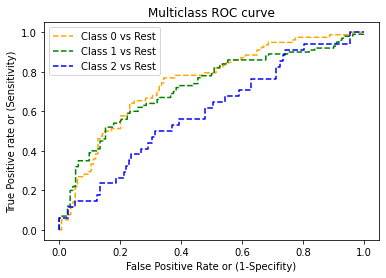

In [ ]:
saved_model_c4 = load_model('best_model_c4')
nn_evaluation_multi(saved_model_c4, c_testX_df, c_testY_df, c_testY_df_oh)

##Model 5: CNN -> LSTM Model

In [ ]:
model_c_nn5 = Sequential() 
model_c_nn5.add(embedding_layer_c)
model_c_nn5.add(Conv1D(100, 2, activation='relu')) #filters, kernel size
model_c_nn5.add(Dropout(0.2))
model_c_nn5.add(Conv1D(100, 3, activation='relu'))
model_c_nn5.add(Dropout(0.2))
model_c_nn5.add(MaxPooling1D(3))
model_c_nn5.add(Conv1D(160, 4, activation='relu'))
model_c_nn5.add(Dropout(0.2))
model_c_nn5.add(Conv1D(160, 5, activation='relu'))
model_c_nn5.add(Dropout(0.2))
model_c_nn5.add(LSTM(128,dropout = 0.3))
model_c_nn5.add(Dense(3))
model_c_nn5.add(Activation('softmax'))
model_c_nn5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
tf.random.set_seed(123)
earlystop = EarlyStopping(monitor = 'val_loss',min_delta = 0,patience = 20, verbose = 1,restore_best_weights = True, mode = 'min')
model_checkpoint = ModelCheckpoint('best_model_c5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model_c_nn5.fit(c_trainX_df_sm,c_trainY_df_sm_oh ,validation_data = (c_validX_df, c_validY_df_oh), epochs=30, verbose = 1, callbacks = [earlystop,model_checkpoint])

Epoch 1/30
202/202 [==============================] - ETA: 0s - loss: 1.0534 - accuracy: 0.4393
Epoch 00001: val_loss improved from inf to 0.90553, saving model to best_model_c5
INFO:tensorflow:Assets written to: best_model_c5/assets
202/202 [==============================] - 9s 45ms/step - loss: 1.0534 - accuracy: 0.4393 - val_loss: 0.9055 - val_accuracy: 0.6382
Epoch 2/30
201/202 [============================>.] - ETA: 0s - loss: 0.9724 - accuracy: 0.5103
Epoch 00002: val_loss improved from 0.90553 to 0.88317, saving model to best_model_c5
INFO:tensorflow:Assets written to: best_model_c5/assets
202/202 [==============================] - 8s 38ms/step - loss: 0.9722 - accuracy: 0.5104 - val_loss: 0.8832 - val_accuracy: 0.6072
Epoch 3/30
201/202 [============================>.] - ETA: 0s - loss: 0.9129 - accuracy: 0.5339
Epoch 00003: val_loss did not improve from 0.88317
202/202 [==============================] - 2s 11ms/step - loss: 0.9129 - accuracy: 0.5340 - val_loss: 0.9634 - val_ac

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           1550400   
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 39, 100)           40100     
_________________________________________________________________
dropout_7 (Dropout)          (None, 39, 100)           0         
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 37, 100)           30100     
_________________________________________________________________
dropout_8 (Dropout)          (None, 37, 100)           0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 12, 100)           0         
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 9, 160)           

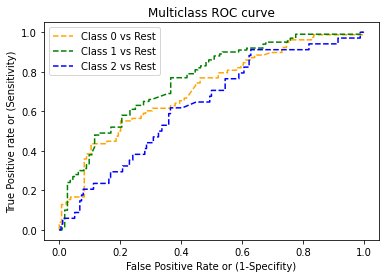

In [ ]:
saved_model_c5 = load_model('best_model_c5')
nn_evaluation_multi(saved_model_c5, c_testX_df, c_testY_df, c_testY_df_oh)

##Test Results

###Test Best Model on Public Data A

In [ ]:
X_exp_a=  pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/X_exp_a.csv',delimiter = ",", header = None)
Y_exp_a = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/y_exp_a.csv',delimiter = ",", header = None)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 200)           2765800   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 40, 256)           336896    
_________________________________________________________________
bidirectional_2 (Bidirection (None, 40, 256)           394240    
_________________________________________________________________
seq_self_attention (SeqSelfA (None, None, 256)         16449     
_________________________________________________________________
conv1d_6 (Conv1D)            (None, None, 64)          65600     
_________________________________________________________________
global_max_pooling1d (Global (None, 64)                0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)               

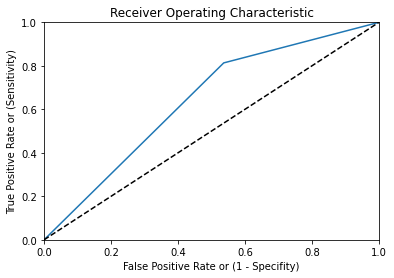

In [ ]:
saved_model_a4 = load_model('best_model_a4')
nn_evaluation(saved_model_a4, X_exp_a, Y_exp_a)

###Test Best Model on Public Data B

In [ ]:
X_exp_b=  pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/X_exp_b.csv',delimiter = ",", header = None)
Y_exp_b = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/y_exp_b.csv',delimiter = ",", header = None)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 40, 200)           1641800   
_________________________________________________________________
conv1d (Conv1D)              (None, 39, 100)           40100     
_________________________________________________________________
dropout (Dropout)            (None, 39, 100)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 37, 100)           30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 100)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 12, 100)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 9, 160)            6

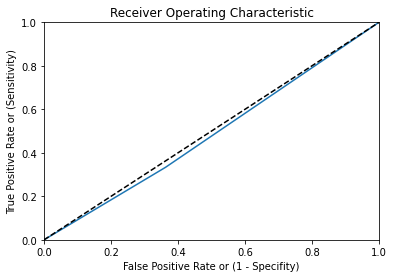

In [ ]:
nn_evaluation(saved_model_b5, X_exp_b,Y_exp_b)

###Test Best Model on Public Data C

In [ ]:
X_exp_c=  pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/X_exp_c.csv',delimiter = ",", header = None)
Y_exp_c = pd.read_csv('/content/drive/My Drive/CDS_Project/OLIDv1/Data/glove/NN/y_exp_c.csv',delimiter = ",", header = None)

In [ ]:
Y_exp_c_oh = encoder.transform(Y_exp_c)
Y_exp_c_oh = np_utils.to_categorical(Y_exp_c_oh)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 200)           1550400   
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 39, 100)           40100     
_________________________________________________________________
dropout_5 (Dropout)          (None, 39, 100)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 37, 100)           30100     
_________________________________________________________________
dropout_6 (Dropout)          (None, 37, 100)           0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 100)           0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 12, 100)          

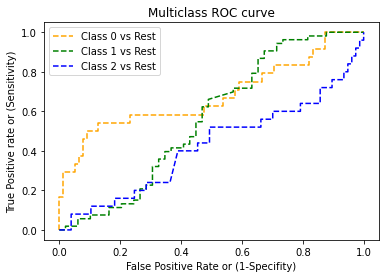

In [ ]:
saved_model_c2 = load_model('best_model_c2')
nn_evaluation_multi(saved_model_c2,X_exp_c, Y_exp_c, Y_exp_c_oh)


